<a href="https://colab.research.google.com/github/AkbarBunyad/Training_Programs/blob/main/gi_group_ds/Evaluation/usa_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 5000, dtype: int64

With 5000 various addresses available, it is appropriate to remove the address column, as it is unlikely to provide any meaningful information.

In [ ]:
df.drop(columns = ['Address'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.rename(columns = {
    'Avg. Area Income': 'avg_area_income',
    'Avg. Area House Age': 'avg_area_house_age',
    'Avg. Area Number of Rooms': 'avg_area_number_of_rooms',
    'Avg. Area Number of Bedrooms': 'avg_area_number_of_bedrooms',
    'Area Population': 'area_population',
    'Price': 'price'
}, inplace = True)

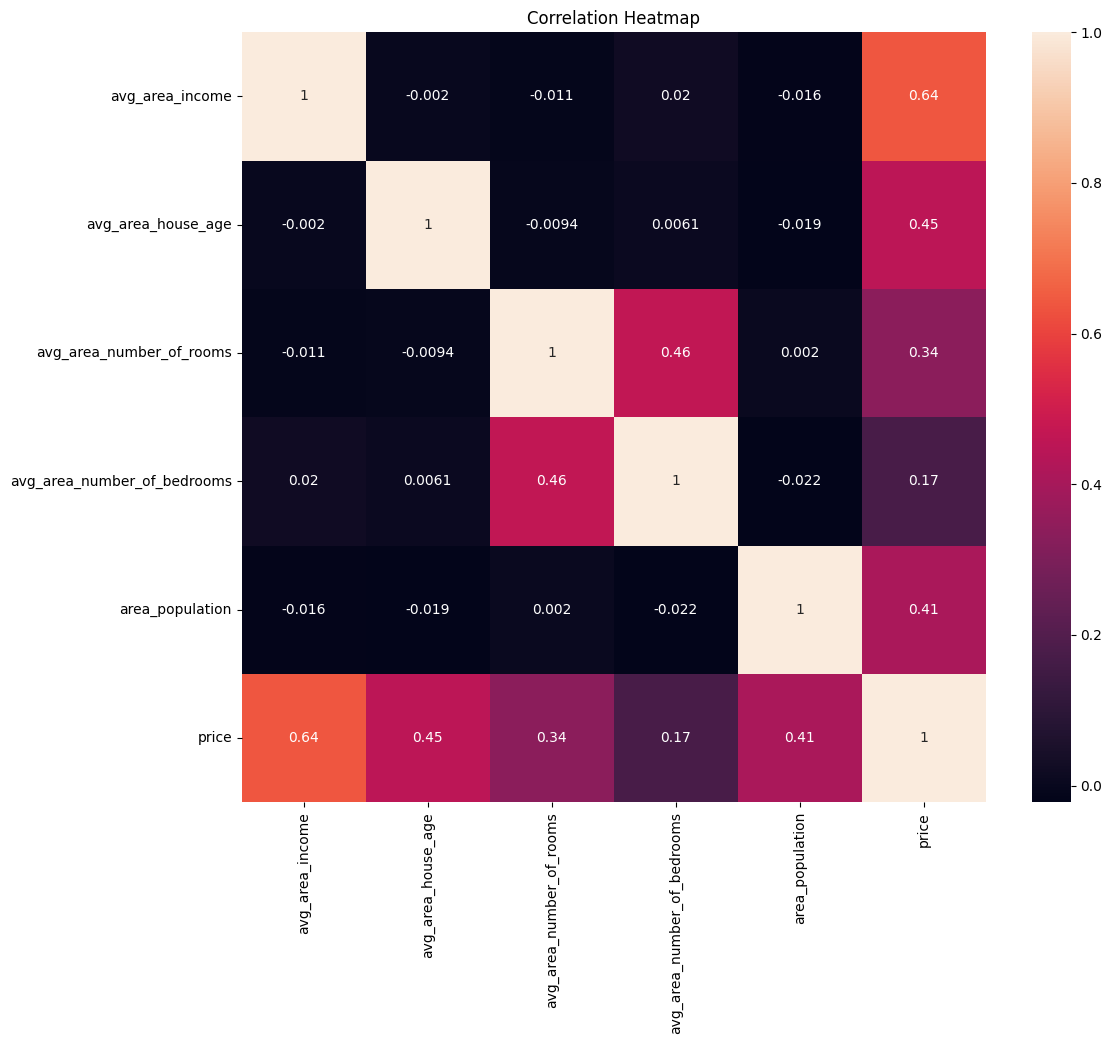

In [ ]:
corr_mat = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr_mat, annot = True)
plt.title('Correlation Heatmap')
plt.show()

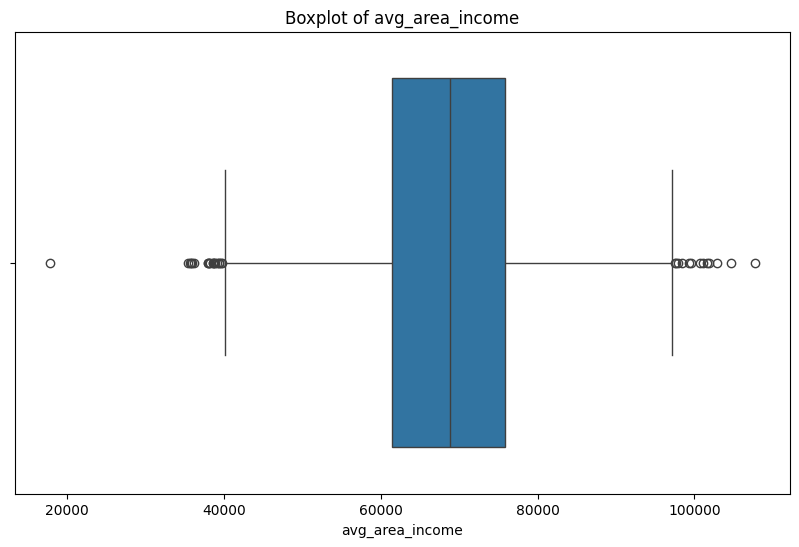

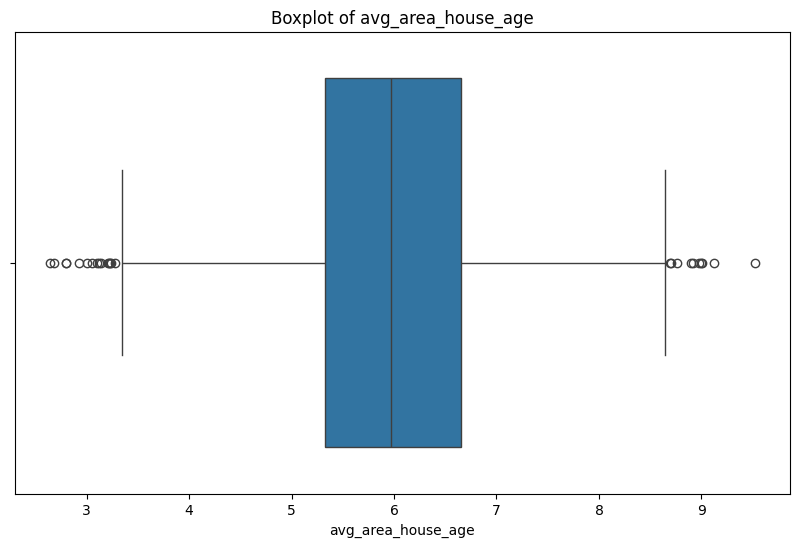

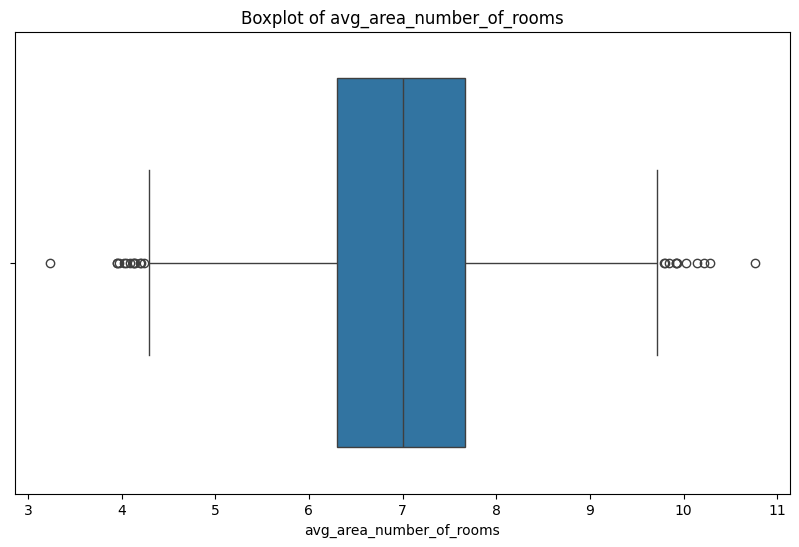

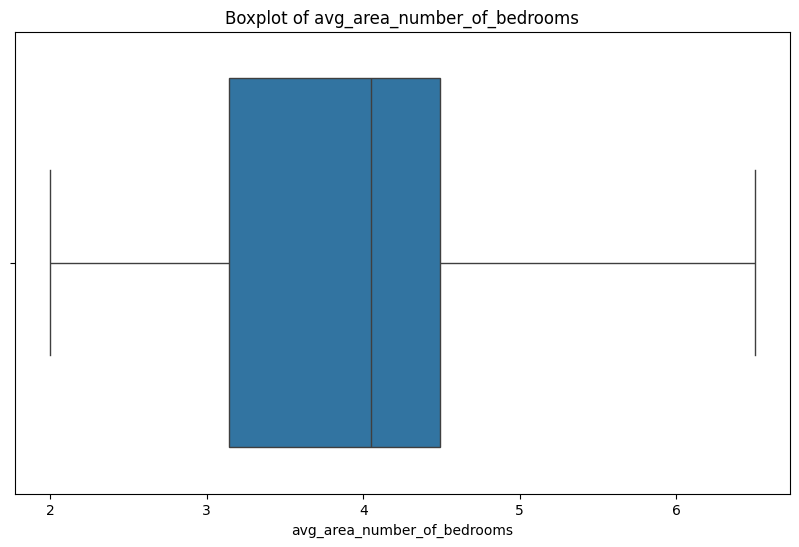

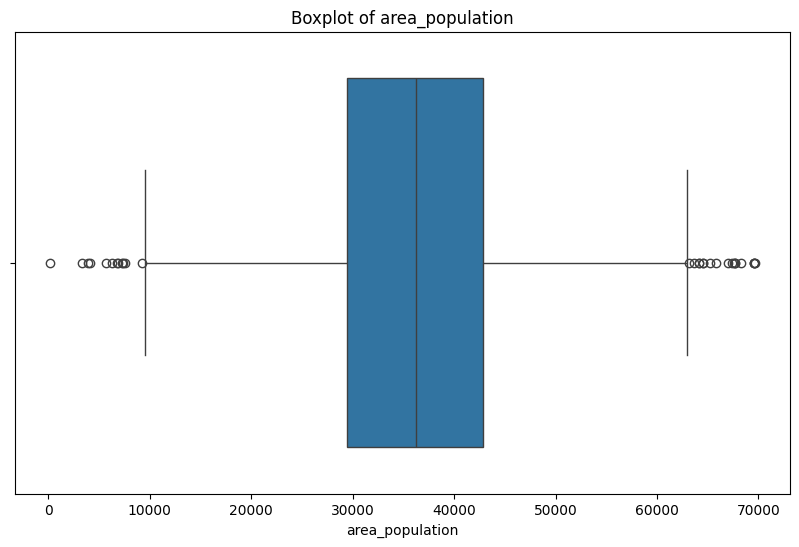

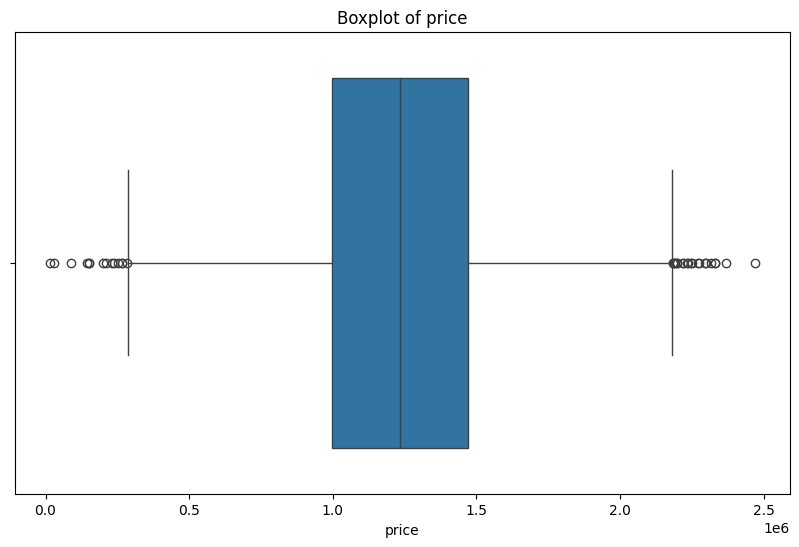

In [ ]:
for col in df.columns:
  plt.figure(figsize = (10, 6))
  sns.boxplot(x = df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

As seen from the plots, there are some outliers across almost each field. Decided to use robust scaling as I do not want to remove them but also do not want them to have an outsized impact on the model alongside standardization.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

param_grids = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.1, 1, 3, 10]},
    'Lasso': {'alpha': [0.1, 1, 3, 10]}
}

scaling_methods = {
    'RobustScaler': (X_train_robust, X_test_robust),
    'StandardScaler': (X_train_standard, X_test_standard)
}

results = {}
for scaling_meth, (X_train_scaled, X_test_scaled) in scaling_methods.items():
  print(f'{scaling_meth} Results')
  for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv = 5, scoring = 'neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv = 5, scoring = 'r2')
    results[f'{scaling_meth}_{model_name}'] = {
        'MSE': mse,
        'R2': r2,
        'Cross Validation': cv_scores.mean(),
        'Best Parameters': grid_search.best_params_
    }

    print(f"\n{model_name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared Score: {r2}")
    print(f"Mean CV R2 score: {np.mean(cv_scores)}")

RobustScaler Results

Linear Regression:
Best Parameters: {}
Root Mean Squared Error: 100444.0605555848
R-squared Score: 0.9179971706834331
Mean CV R2 score: 0.9174131909728761

Ridge:
Best Parameters: {'alpha': 1}
Root Mean Squared Error: 100444.10497565483
R-squared Score: 0.9179970981540629
Mean CV R2 score: 0.9174130896428634

Lasso:
Best Parameters: {'alpha': 10}
Root Mean Squared Error: 100443.76575513589
R-squared Score: 0.9179976520346507
Mean CV R2 score: 0.9174131789539904
StandardScaler Results

Linear Regression:
Best Parameters: {}
Root Mean Squared Error: 100444.06055558482
R-squared Score: 0.9179971706834331
Mean CV R2 score: 0.9174131909728761

Ridge:
Best Parameters: {'alpha': 1}
Root Mean Squared Error: 100444.03012977762
R-squared Score: 0.9179972203628644
Mean CV R2 score: 0.9174132219499216

Lasso:
Best Parameters: {'alpha': 10}
Root Mean Squared Error: 100443.71666703561
R-squared Score: 0.9179977321857375
Mean CV R2 score: 0.9174131841837154


It was found that scaling did not significantly impact the performance metrics. However, due to robust scaling's superior ability to handle outliers, it is more preferable.

In [ ]:
best_model_name = max(results, key = lambda x: results[x]['R2'])

In [ ]:
best_model_name

'StandardScaler_Lasso'

In [ ]:
best_scaling = best_model_name.split('_')[0]
best_model_type = best_model_name.split('_')[1]

In [ ]:
best_model = models[best_model_type]
best_model

Lasso()

In [ ]:
results

{'RobustScaler_Linear Regression': {'MSE': 10089009300.893988,
  'R2': 0.9179971706834331,
  'Cross Validation': 0.9174131909728761,
  'Best Parameters': {}},
 'RobustScaler_Ridge': {'MSE': 10089018224.360367,
  'R2': 0.9179970981540629,
  'Cross Validation': 0.9174130896428634,
  'Best Parameters': {'alpha': 1}},
 'RobustScaler_Lasso': {'MSE': 10088950079.072609,
  'R2': 0.9179976520346507,
  'Cross Validation': 0.9174131789539904,
  'Best Parameters': {'alpha': 10}},
 'StandardScaler_Linear Regression': {'MSE': 10089009300.89399,
  'R2': 0.9179971706834331,
  'Cross Validation': 0.9174131909728761,
  'Best Parameters': {}},
 'StandardScaler_Ridge': {'MSE': 10089003188.711674,
  'R2': 0.9179972203628644,
  'Cross Validation': 0.9174132219499216,
  'Best Parameters': {'alpha': 1}},
 'StandardScaler_Lasso': {'MSE': 10088940217.887726,
  'R2': 0.9179977321857375,
  'Cross Validation': 0.9174131841837154,
  'Best Parameters': {'alpha': 10}}}

In [ ]:
best_params = results[best_model_name]['Best Parameters']
best_params

{'alpha': 10}

In [ ]:
best_model.set_params(**best_params)
best_model.fit(X_train_standard, y_train)

Lasso(alpha=10)

In [ ]:
y_pred = best_model.predict(X_test_standard)
residuals = y_test - y_pred

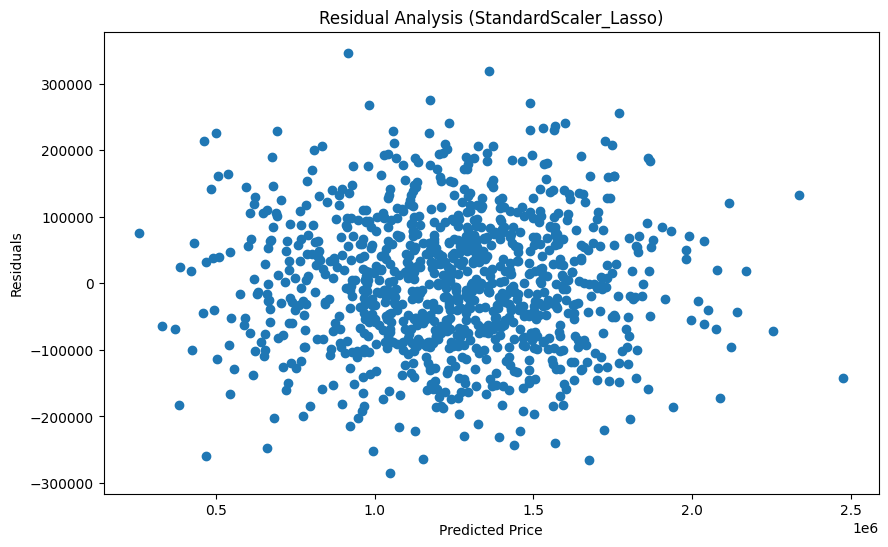

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title(f"Residual Analysis ({best_model_name})")
plt.show()

It does not provide that much of insight into the error we have made during prediction, which is why better to use relative error.

In [ ]:
print("\nPredictions vs Actual Values:")
errors = []
for i in range(len(X_test)):
    prediction = y_pred[i]
    actual = y_test.iloc[i]
    error = abs(residuals.iloc[i]) / actual * 100
    errors.append(error)
    #print(f"Prediction: [{prediction:.8f}], Target Value: [{actual:.8f}], Error: [{error:.8f}]")
print(np.mean(errors))


Predictions vs Actual Values:
7.3879194586926875


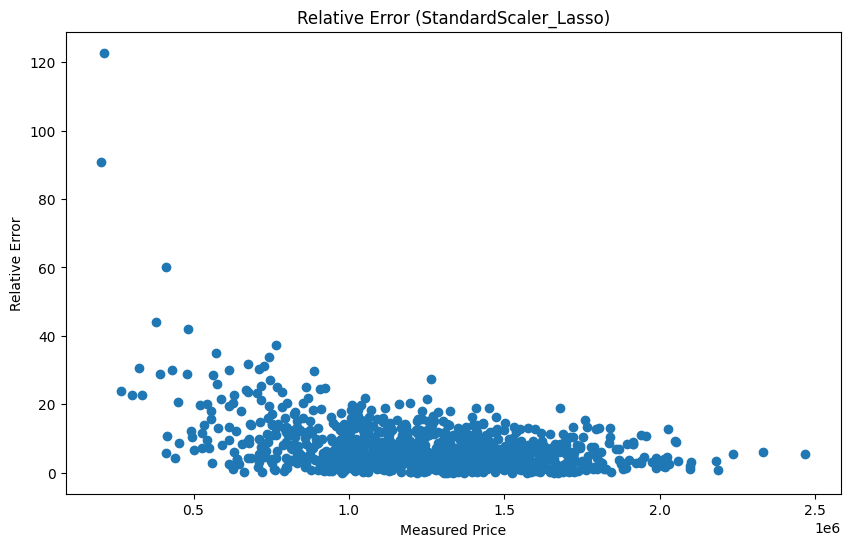

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors)
plt.xlabel("Measured Price")
plt.ylabel("Relative Error")
plt.title(f"Relative Error ({best_model_name})")
plt.show()